#### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

#### Importing Data

In [3]:
data = pd.read_csv(r"F:\Analytix Lab\Datasets\Diwali Sales Analysis\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv", encoding= 'unicode_escape')
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Dropping 'Status' and 'Unnamed1' column

data = data.drop(columns=['Status','unnamed1'])
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
# Renaming Age group 
data.rename(columns={'Age Group':'Age_Group'}, inplace=True)

In [7]:
# Checking for missing values
data.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age_Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# dropping null values
data = data.dropna()

In [9]:
# Checking for missing values post dropping
data.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age_Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### EDA

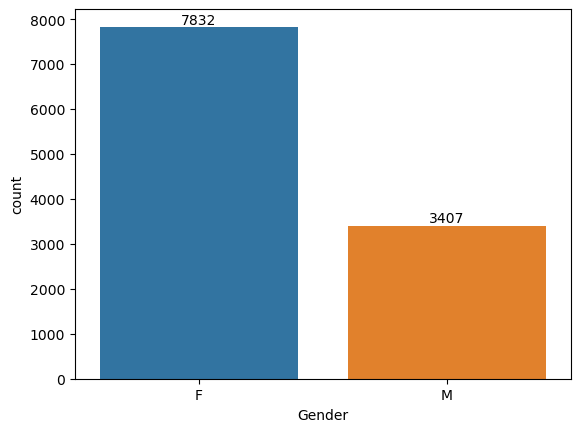

In [10]:
# Gender Analysis
fig = sns.countplot(x = 'Gender', data=data)
for i in fig.containers:
    fig.bar_label(i)
plt.show()

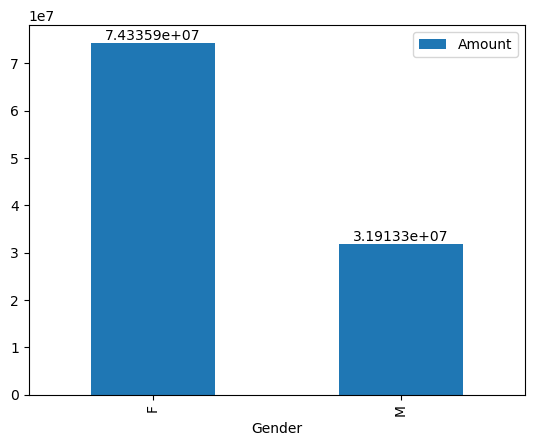

In [11]:
fig = data.groupby('Gender')[['Amount']].sum().plot(kind = 'bar')
for i in fig.containers:
    fig.bar_label(i)
plt.show()

**From above analysis we can se Females are contributing more to Sales**

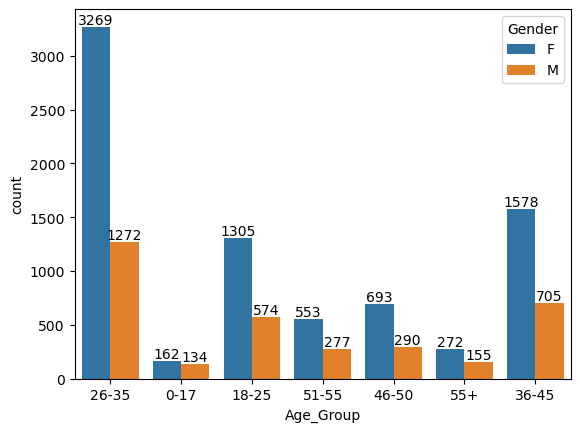

In [13]:
# Analysing Age column 
fig = sns.countplot(x = 'Age_Group', data = data, hue = 'Gender')
for i in fig.containers:
    fig.bar_label(i)
plt.show()

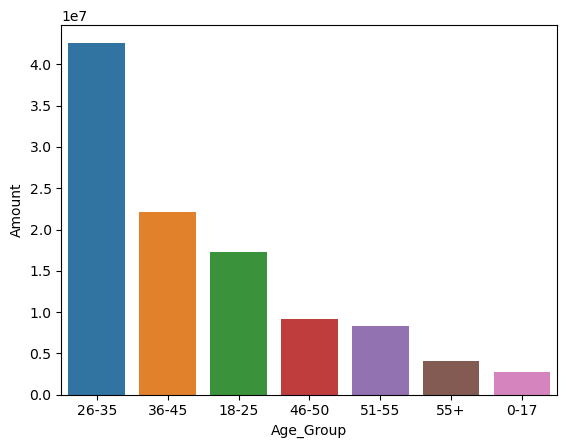

In [14]:
Age_grp_summ = data.groupby('Age_Group', as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age_Group', y = 'Amount', data=Age_grp_summ)
plt.show()

**From above analysis we can see max customers are from Age Grp 26-35 and generating Max Sales**

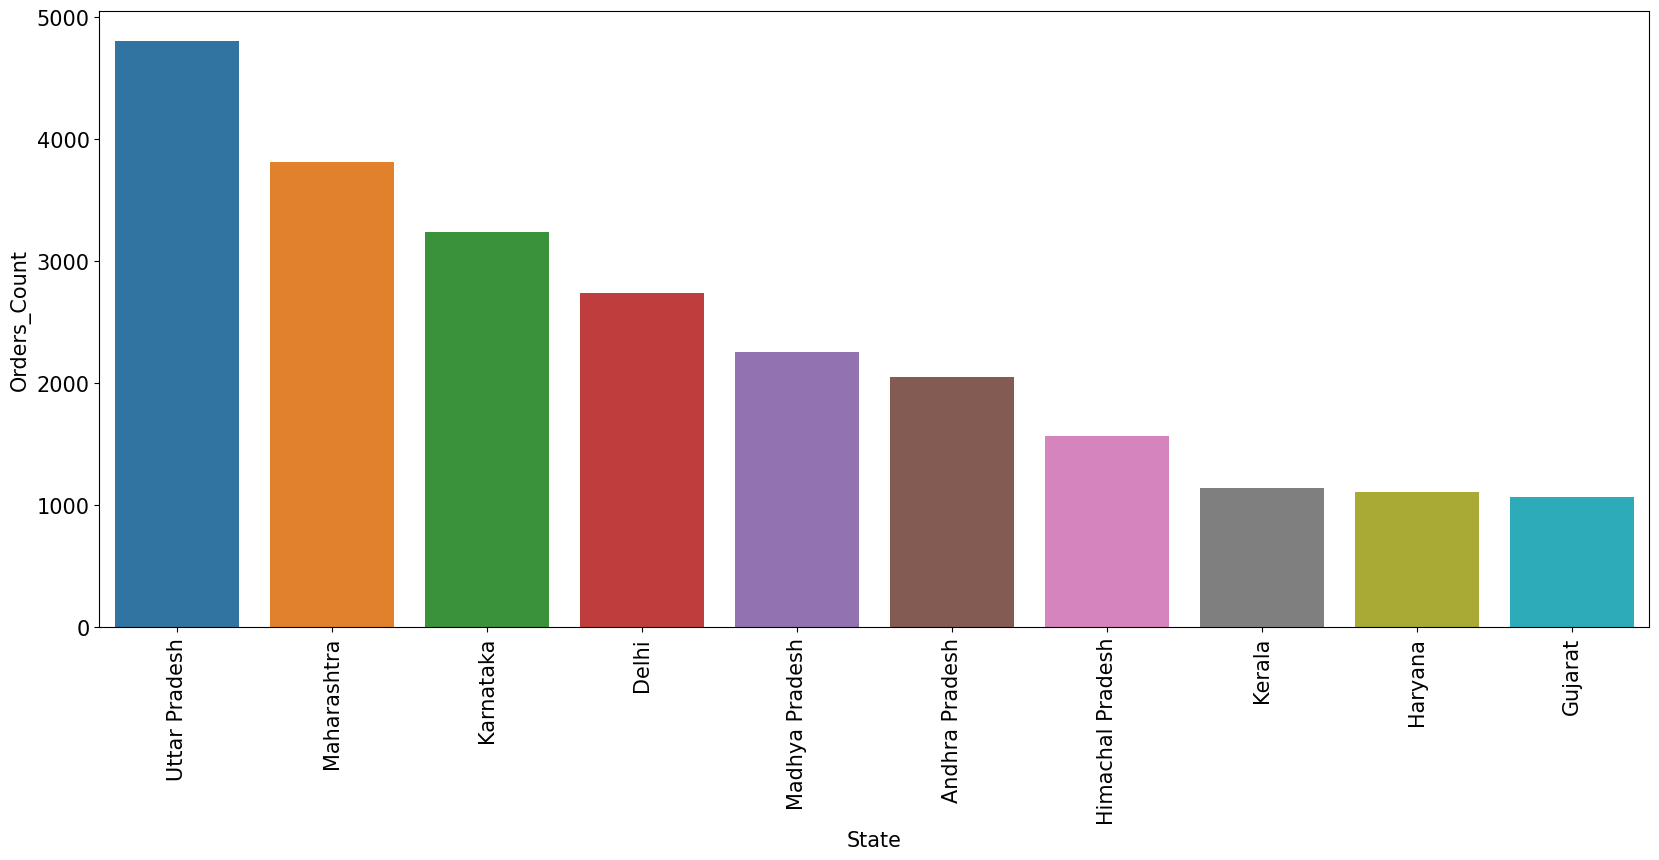

In [15]:
# Analysing Statewise Order count
plt.figure(figsize=(20,8))
orders_state = data.groupby('State', as_index=False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(x = 'State', y = 'Orders', data=orders_state)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Orders_Count', fontsize = 15)
plt.show()



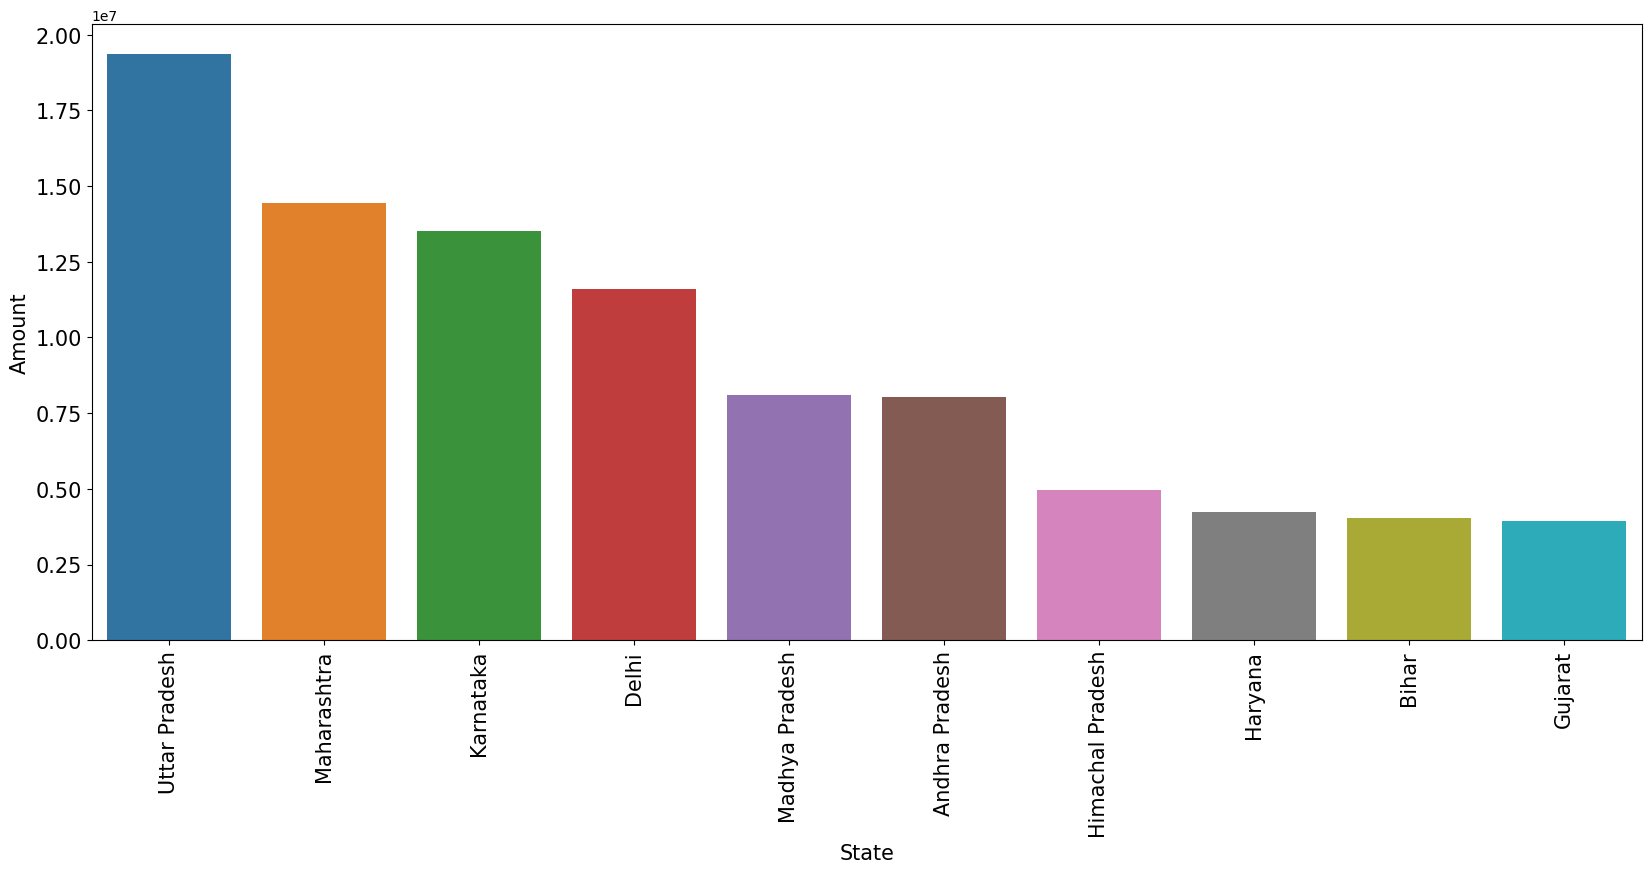

In [16]:
# Analysing Statewise Sales Amount
plt.figure(figsize=(20,8))
sales_state = data.groupby('State', as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.barplot(x = 'State', y = 'Amount', data=sales_state)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)
plt.xlabel(xlabel= 'State', fontsize = 15)
plt.ylabel(ylabel= 'Amount', fontsize = 15)
plt.show()

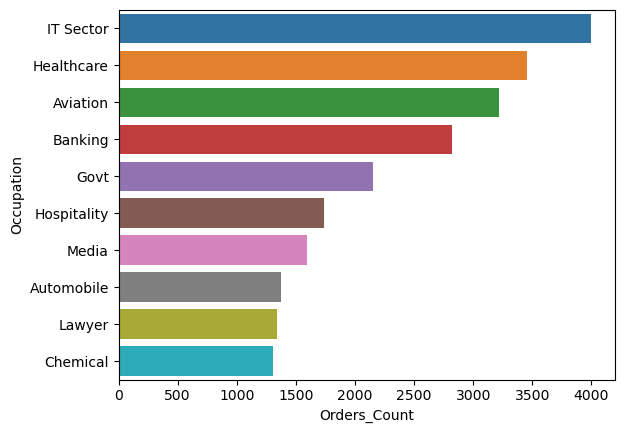

In [18]:
# Occupation wise Order count

orders_occupation = data.groupby('Occupation', as_index=False)['Orders'].sum().sort_values(by ='Orders', ascending = False ).head(10)
sns.barplot(x = 'Orders', y = 'Occupation', data = orders_occupation)
plt.xlabel('Orders_Count')
plt.show()

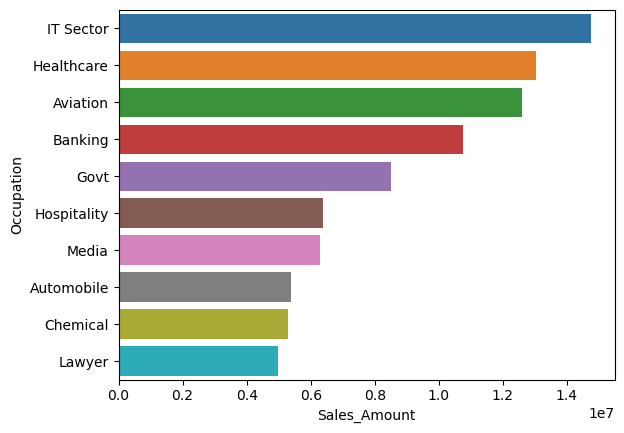

In [19]:
# Occupation wise Sales Amount

sales_occupation = data.groupby('Occupation', as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending = False ).head(10)
sns.barplot(x = 'Amount', y = 'Occupation', data = sales_occupation)
plt.xlabel('Sales_Amount')
plt.show()

**From above analysis we can see max customers are from IT sector followed by Healthcare Occupation and generating Sales in same order**